# Лаба 1 (Начало)


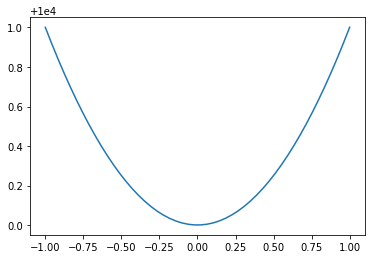

In [1]:
import numpy as np
import matplotlib.pyplot as plt

u1 = lambda x1, x2: 1 * 0.001 + 1 / x1 * 1 + x1 * 0.001 + x2 * 0.0001 + x2**2 * 1


fig = plt.subplots()
x = np.linspace(-1, 1, 50)
plt.plot(x, u1(0.0001, x))
plt.show()

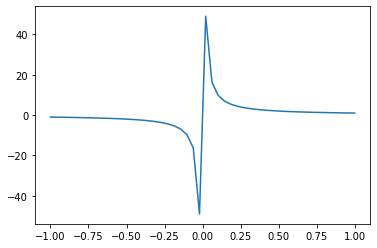

In [2]:
fig = plt.subplots()
x = np.linspace(-1, 1, 50)
plt.plot(x, u1(x, 0))
plt.show()

### Генерация данных

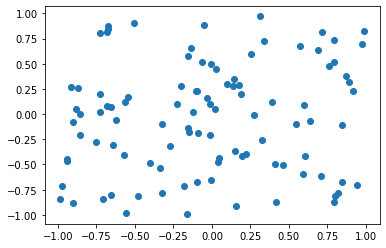

In [3]:
import random as rnd

x1_points = []
x2_points = []

for s in range(0, 100):
    x1_points.append((rnd.random() - 0.5) * 2)
    x2_points.append((rnd.random() - 0.5) * 2)
    
for s in range(0, len(x1_points)):
    if x1_points[s] == 0 or x2_points[s] == 0:
        x1_points.remove(s)
        x2_points.remove(s)
        
fig = plt.subplots()
plt.scatter(x1_points, x2_points)
plt.show()

In [4]:
file_1 = open('out_lab_1.txt', 'w')

leng = len(x1_points)
for s in range(leng):
    file_1.write(str(s+1)+ "\t" + str(x1_points[s]) + "\t" + str(x2_points[s]) + "\n")
    
file_1.close()

In [5]:
vector_u = list()
for i in range(leng):
    vector_u.append(u1(x1_points[i], x2_points[i]))

vect_arr_u = np.array(vector_u)
average_u = vect_arr_u.mean()

w2 = np.dot(vect_arr_u - average_u, vect_arr_u - average_u) / (len(vect_arr_u - 1))
p = 0.13
sig = p * (w2)**0.5

# Лаба 2

In [6]:
import math
import scipy
from scipy import optimize

f = lambda x1, x2 : np.array([1, 1/x1, x1, x2, x2**2]) 
teta = np.array([0.001, 1, 0.001, 0.0001, 1])


In [7]:
import math

# Сгенерировали U с помехами
y = []
for i in range(len(x1_points)):
    y.append(vector_u[i] * (1 + rnd.choice([-1,1]) * 0.05 ))

# Построение матрицы X
X = []
for i in range(len(teta)):
    X.append([])
    for j in range(len(x1_points)):
        X[i].append(f(x1_points[j], x2_points[j])[i])
       
X = np.matrix(X)

Q1 = X.dot(X.T)
Q1 = np.linalg.inv(Q1)
Q1 = Q1.dot(X)
Q1 = Q1 * np.matrix(y).T

In [8]:
e = []
e = y - (X.T).dot(np.matrix(teta).T).T
sigma2 = float(e.dot(e.T)/(len(vect_arr_u)-len(teta)))
F = sigma2 / sig**2
print("Sigma 2 = " + str(sigma2))
print("F = " + str(F))

file_1 = open('out_lab_2.txt', 'w')

leng = len(x1_points)
for s in range(leng):
    file_1.write(str(s+1)+ "\t" + str(x1_points[s]) + "\t" + str(x2_points[s]) + "\n")
    
file_1.close()

Sigma 2 = 2.0702512350824636
F = 0.15953752602385732
